# Statistics and Reproducibility

<h1>Statistics and Reproducibility</h1>

<p>
<b>Quantitative Big Imaging - ETHZ: 227-0966-00L</b>
<br />
</p>
<br />
<p style="font-size:1em;">April 22, 2021</p>
<br /><br />
<p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner</p>  
<p style="font-size:1em;">Laboratory for Neutron Scattering and Imaging<br />Paul Scherrer Institut</p>

In [11]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
%matplotlib inline

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Literature / Useful References

### Books
- Jean Claude, _Morphometry with R_
 - [Online](http://link.springer.com/book/10.1007%2F978-0-387-77789-4) through ETHZ
 - __Chapter 3__
- John C. Russ, _The Image Processing Handbook_,(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
- [Hypothesis Testing Chapter](http://www.sagepub.com/upm-data/40007_Chapter8.pdf)
- Grammar of Graphics: Leland and Wilkinson - http://www.springer.com/gp/book/9780387245447

### Papers / Sites
- [Matlab Unit Testing Documentation](http://www.mathworks.ch/ch/help/matlab/matlab-unit-test-framework.html
)
- [Databases Introduction](http://swcarpentry.github.io/sql-novice-survey/)
- [Visualizing Genomic Data](http://circos.ca/documentation/course/visualizing-genomic-data.pdf) (General Visualization Techniques)
- [NIMRod Parameter Studies](http://www.messagelab.monash.edu.au/nimrod)

- M.E. Wolak, D.J. Fairbairn, Y.R. Paulsen (2012) Guidelines for Estimating Repeatability. Methods in Ecology and Evolution 3(1):129-137.
- David J.C. MacKay, [Bayesian Interpolation](http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.27.9072) (1991) 

### Videos / Podcasts
- [Google/Stanford Statistics Intro](https://www.youtube.com/watch?v=YFC2KUmEebc)
- Last Week Tonight: [Scientific Studies](https://www.youtube.com/watch?v=0Rnq1NpHdmw)
- [Credibility Crisis](https://www.datacamp.com/community/podcast/credibility-crisis-in-data-science)

### Further material
#### Slides
- [How to solve NLP problems](https://twitter.com/sleepinyourhat/status/1105946169165955073?s=20)
- [Data Visualization](https://socviz.co/lookatdata.html)
- [P-Values with Puppies](https://hackernoon.com/explaining-p-values-with-puppies-af63d68005d0)

#### Model Evaluation

- [Julia Evans - Recalling with Precision](https://www.youtube.com/watch?v=ryZL4XNUmwo)
- [Stripe's Next Top Model](https://github.com/stripe/topmodel)

#### Iris Dataset

- The Iris dataset was used in Fisher's classic 1936 paper, [The Use of Multiple Measurements in Taxonomic Problems](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf)

## Previously on QBI ...

- Image Enhancment 
 - Highlighting the contrast of interest in images
 - Minimizing Noise
- Understanding image histograms
- Automatic Methods
- Component Labeling
- Single Shape Analysis
- Complicated Shapes

## Quantitative "Big" Imaging


The course has covered imaging enough and there have been a few quantitative metrics, but "big" has not really entered.

What does __big__ mean?

- Not just / even large
- it means being ready for _big data_
- volume, velocity, variety (3 V's)
- scalable, fast, easy to customize


So what is "big" imaging

###  Doing analyses in a disciplined manner

 - fixed steps
 - easy to regenerate results
 - no _magic_
 - documentation
 
#### Having everything automated

 - 100 samples is as easy as 1 sample
 
#### Being able to adapt and reuse analyses

 - one really well working script and modify parameters
 - different types of cells
 - different regions

## Objectives

1. Scientific Studies all try to get to a single number
 - Make sure this number is describing the structure well (what we have covered before)
 - Making sure the number is meaningful (__today!__)
1. How do we compare the number from different samples and groups?
 - Within a sample or same type of samples
 - Between samples
1. How do we compare different processing steps like filter choice, minimum volume, resolution, etc?
1. How do we evaluate our parameter selection?
1. How can we ensure our techniques do what they are supposed to do?
1. How can we visualize so much data? Are there rules?

## What do we start with?

Going back to our original cell image

1. We have been able to __get rid of the noise__ in the image and __find all the cells__ (lecture 2-4)
1. We have __analyzed the shape__ of the cells using the shape tensor (lecture 5)
1. We even __separated cells joined together__ using Watershed (lecture 6)
1. We have created even more __metrics characterizing the distribution__ (lecture 7)

We have at least a few samples (or different regions), large number of metrics and an almost as large number of parameters to _tune_

__How do we do something meaningful with it?__

## Today's outline

- Motivation (Why and How?)
- Scientific Goals
- Reproducibility
- Predicting and Validating
- Statistical metrics and results
- Parameterization
 - Parameter sweep
 - Sensitivity analysis
- Data frames
- Visualization

# Correlation and Causation


One of the most repeated criticisms of scientific work is that correlation and causation are confused. 

1. __Correlation__ 
 - means a statistical relationship
 - very easy to show (single calculation)
2. __Causation__ 
 - implies there is a mechanism between A and B
 - very difficult to show (impossible to prove)

## Observational or Controlled

There are two broad classes of data and scientific studies. 

- Observational 
- Controlled

Each type appears, but it is more likely to perform observational studies in the early stages of a project to gain an overview of the working field. From this study it you will make observations for more detailed studies which then are controlled.

<table>
<col width="400px" />
<tr><th>Observational</th><th>Controlled</th></tr>    
<tr><td><img src="figures/noun_MuseumVisit.svg" /></td>
<td><img src="figures/noun_puppet.svg" /></td><tr>
</table>

```{figure} figures/noun_MuseumVisit.pdf
---
scale: 50%
name: fig_observer
---
In observational experiments you stand back and only observe what is happening.
```

```{figure} figures/noun_puppet.pdf
---
scale: 50%
name: fig_controller
---
In controlled experiments you prepare the samples for a specific purpose and control the environment.
```

### Observational

In observational experiments you are not interfering with the observed phenomenon. You only make a selection of specimens or individuals that will be measured as they appear.

 - Exploring large datasets looking for trends
 - Population is random
 - Not always hypothesis driven
 - Rarely leads to causation


#### Examples of observational experiments
- We examined 100 people 
    - the ones with blue eyes were on average 10cm taller
    
- In 100 cake samples
    - we found a 0.9 correlation between cooking time and bubble size

### Controlled

 - Most scientific studies fall into this category
 - Specifics of the groups are controlled
 - Can lead to causation

#### Examples of controlled experiments
- We examined 50 mice with gene XYZ off and 50 gene XYZ on and as the foot size increased by 10%
- We increased the temperature and the number of pores in the metal increased by 10%
 

# Simple Model

It often convenient to start with a simplified models for your experiments where most uncertainties are reduced. In particular here in this lecture we chose a simple model for the demonstration

Since most of the experiments in science are usually 
- specific, 
- noisy, 
- and often very complicated 

and are not usually good teaching examples.

We go for a simple model...

## Magic / Biased Coin

Our model is the task to flip a coin and determine if it is a fair or loaded. The coin has two outcomes
- head
- or tail

You buy a _magic_ coin at a shop.

### How many times do you need to flip it to _prove_ it is not fair?

Next step is to describe an experiment strategy. Some examples are:

- If I flip it 10 times and another person flips it 10 times, is that the same as 20 flips?
- If I flip it 10 times and then multiply the results by 10 is that the same as 100 flips?
 
 <br/>

As you already may have guessed, these are not the best assumtions, in particular not the second one. 

A different question is about collections of random variables:

- If I buy 10 coins and want to know which ones are fair what do I do?

<img src="figures/np_coin-toss.svg" />

```{figure} figures/np_coin-toss.pdf
---
scale: 25%
---
Tossing a coin is a simple random process.
```

## Experiment: Magic / Weighted Coin


1. Each coin represents a stochastic variable $\mathcal{X}$ and each flip represents an observation $\mathcal{X}_i$.
1. The act of performing a coin flip $\mathcal{F}$ is an observation $\mathcal{X}_i = \mathcal{F}(\mathcal{X})$

We normally assume

1. A _fair_ coin has an expected value of $E(\mathcal{X})=\frac{1}{2}$:
    - 50% Heads, 
    - 50% Tails
    
1. An _unbiased_ flip(er) means  _each flip is independent of the others_

$$P(\mathcal{F}_1(\mathcal{X})\cdot{}\mathcal{F}_2(\mathcal{X}))= P(\mathcal{F}_1(\mathcal{X}))\cdot{}P(\mathcal{F}_2(\mathcal{X}))$$

 - the expected value of the flip is the same as that of the coin
 
$$ E\left(\prod_{i=0}^\infty \mathcal{F}_i(\mathcal{X})\right) = E(\mathcal{X}) $$

## Simple Model to Reality


### Coin Flip

1. Each flip gives us a small piece of information about 
    - the coin 
    - _and_ the flipper

<br/>

2. More flips provides more information
 - __Random / Stochastic variations__ in coin and flipper __cancel out__
 - __Systematic variations accumulate__

### Simple Model to Reality - real experiment


1. Each measurement tells us about: 
    - our sample, 
    - our instrument, 
    - and our analysis
    
<br />    
    
2. More measurements provide more information:
 - Random / Stochastic variations in sample, instrument, and analysis cancel out
 - _Normally_ the analysis has very little to no stochastic variation
 - Systematic variations accumulate

This is also the reason why we want many repeated observations in an experiment. Repetitions are however expensive, they require time to perform the experiment and more material for the specimens. Therefore, a pragmatic choice must be made that balances the cost versus a reasonable amount of observations. 

# A more complicated model

Coin flips are very simple and probably difficult to match to another experiment. 

A very popular dataset for learning about such values beyond 'coin-flips' is called the [Iris dataset](http://archive.ics.uci.edu/ml/datasets/iris) which covers
- a number of measurements 
- from different plants 
- and the corresponding species.

<center>
<img src="figures/Iris.png" style="height:300px"/>
</center>

## Let's load the Iris data

The data set has information about dimensions of the flower anatomy for each of the three species. We load the data which is provided as a python dictionary and prepare a data frame for the table. You will get a more detailed introduction to pandas data frames later in this lecture.

In [41]:
data              = load_iris()
iris_df           = pd.DataFrame(data['data'], columns=data['feature_names'])
iris_df['target'] = data['target_names'][data['target']]
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
125,7.2,3.2,6.0,1.8,virginica
11,4.8,3.4,1.6,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor
47,4.6,3.2,1.4,0.2,setosa


## A first inspection of the data

We use a pair plot to inspect the table. Each target species is assigned a color to allow conclusions regarding clusters.

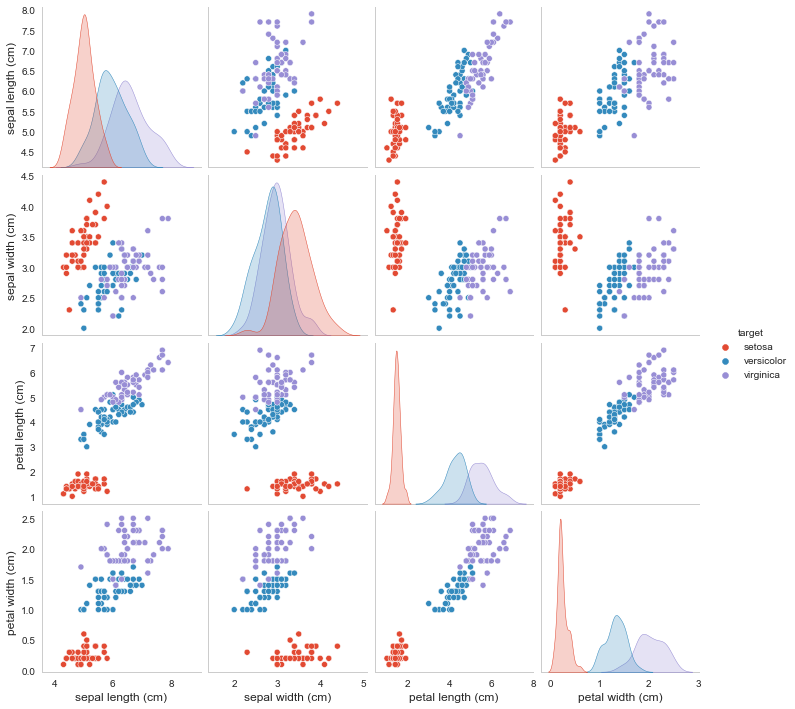

In [3]:
sns.pairplot(iris_df, hue='target');

In the plot, we clearly see that one species (setosa) in general has other flower dimensions than the other two. 

## Comparing Groups: Intraclass Correlation Coefficient

The intraclass correlation coefficient basically looking at 
- how similar objects within a group are 
- compared to the similarity between groups

### Sepal width

Sepals are the green leaves of the flower bud. In this swarm plot we look at the width of the sepals and see that the variance of each class is about the same and also the the average width doesn't vary much. Under such conditions it is hard to separate the groups from each other and we are talking about a _low group similarity_.

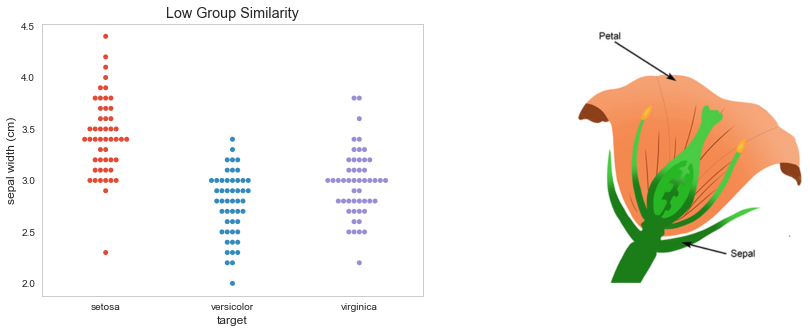

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.swarmplot(data=iris_df, ax = ax1,
               x='target', y='sepal width (cm)');ax1.set_title('Low Group Similarity');
ax2.imshow(plt.imread('figures/FlowerAnatomy.png')); ax2.axis('off');

### Petal length

Petals are the colourful and beautiful leaves of the flower. In this swarm plot of the petal length we see that the petals are more clustered and the averages are well separated from each other. This is a case we know is easy to separate the groups and we are talkning about data with a _high group similarity_.

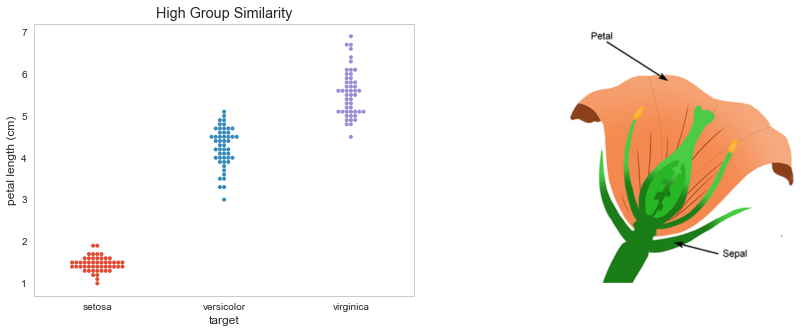

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
g = sns.swarmplot(data=iris_df, ax=ax1,
               x='target', y='petal length (cm)',size=4);g.set_title('High Group Similarity');
ax2.imshow(plt.imread('figures/FlowerAnatomy.png')); ax2.axis('off');

## Making quantitative statements
### Intraclass Correlation Coefficient Definition

$$ICC=\frac{S_A^2}{S_A^2+S_W^2}$$

where 
- $S_A^2=\mathrm{s}[\mathrm{E}[x_{group}]]^2$ is the variance among groups or classes
 - Estimate with the standard deviations of the mean values for each group 
- $S_W^2=\mathrm{E}[\mathrm{s}[x_{group}]^2]$ is the variance within groups or classes.
 - Estimate with the average of standard deviations for each group

#### Interpretation
$$ICC=\begin{cases}1&\mbox{means 100 percent of the variance is between classes}\\0&\mbox{means 0 percent of the variance is between classes}\end{cases}$$

### Intraclass Correlation Coefficient: Values


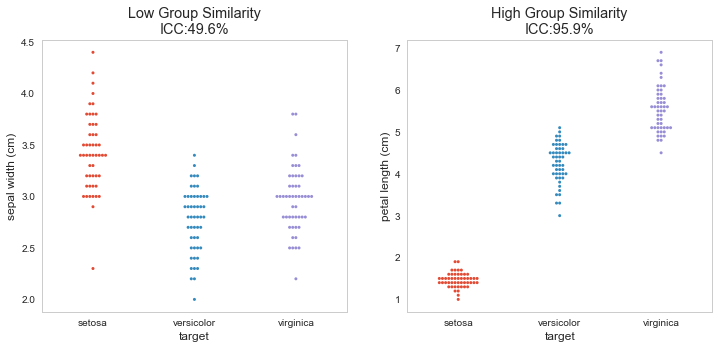

In [13]:
def icc_calc(value_name, group_name, data_df):
    data_agg = data_df.groupby(group_name).agg({value_name: ['mean', 'var']}).reset_index()
    data_agg.columns = data_agg.columns.get_level_values(1)
    S_w = data_agg['var'].mean()
    S_a = data_agg['mean'].var()
    return S_a/(S_a+S_w)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.swarmplot(data=iris_df, ax=ax1,
               x='target', y='sepal width (cm)',size=3)
ax1.set_title('Low Group Similarity\nICC:{:2.1%}'.format(icc_calc('sepal width (cm)', 'target', iris_df)));

sns.swarmplot(data=iris_df,ax=ax2, 
               x='target', y='petal length (cm)',size=3)
ax2.set_title('High Group Similarity\nICC:{:2.1%}'.format(icc_calc('petal length (cm)', 'target', iris_df)));

# Comparing Groups


Once the reproducibility has been measured, it is possible to compare groups. 

The idea is to make a test to assess the likelihood that two groups are the same given the data

1. List assumptions
1. Establish a null hypothesis
 - Usually that both groups are the same
1. Calculate the probability of the observations given the truth of the null hypothesis
 - Requires knowledge of probability distribution of the data
 - Modeling can be exceptionally complicated
 

## Loaded Coin example

We have 1 coin from a magic shop.

- Our assumptions are:
 - we flip and observe flips of coins accurately and independently
 - the coin is invariant and always has the same expected value
 
 
- Our null hypothesis is the coin is unbiased $E(\mathcal{X})=0.5$
- we can calculate the likelihood of a given observation given the number of flips ([p-value](https://en.wikipedia.org/wiki/P-value))

<center>
<img src="figures/p-value.svg" style="height:300px"/>
</center>

How good is good enough?

```{figure} figures/p-value.pdf
---
scale: 100%
---
Explaining p-value with the normal distribution.
```

## Comparing Groups: Student's T Distribution

- Since we do not usually know our distribution very well 
- _or_ have enough samples to create a sufficient probability model

### [Student T Distribution](http://en.wikipedia.org/wiki/Student's_t-distribution)
We assume the distribution of our stochastic variable is normal (Gaussian) and the t-distribution provides an estimate for the mean of the underlying distribution based on few observations.

- We estimate the likelihood of our observed values assuming they are coming from random observations of a normal process



### [Student T-Test](https://en.wikipedia.org/wiki/Student%27s_t-test)

Incorporates this distribution and provides an easy method for assessing the likelihood that the two given set of observations are coming from the same underlying process (null hypothesis)

- Assume unbiased observations
- Assume normal distribution

# Multiple Testing Bias


Back to the magic coin, let's assume we are trying to publish a paper, 
- we heard a p-value of < 0.05 (5%) was good enough. 
- That means if we get 5 heads we are good!

## Probability with increasing number of tosses

$$ P = \prod_i P(\mathcal{F}_i(\mathcal{X}))$$

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from IPython.display import display
all_heads_df = pd.DataFrame({'n_flips': [1, 4, 5]})
all_heads_df['Probability of # Heads'] = all_heads_df['n_flips'].map(
    lambda x: '{:2.1%}'.format(0.5**x))
display(all_heads_df)

,n_flips,Probability of # Heads
0,1,50.0%
1,4,6.2%
2,5,3.1%


## Probability with many experiments
Let N friends make 5 tosses...

In [2]:
friends_heads_df = pd.DataFrame({'n_friends': [1, 10, 20, 40, 80]})
friends_heads_df['Probability of 5 Heads'] = friends_heads_df['n_friends'].map(
    lambda n_friends: '{:2.1%}'.format((1-(1-0.5**5)**n_friends)))
display(friends_heads_df)

,n_friends,Probability of 5 Heads
0,1,3.1%
1,10,27.2%
2,20,47.0%
3,40,71.9%
4,80,92.1%


Clearly this is not the case, otherwise we could keep flipping coins or ask all of our friends to flip until we got 5 heads and publish

The p-value is only meaningful when the experiment matches what we did. 
- __We didn't say the chance of getting 5 heads ever was < 5%__
- __We said is if we have__
    - exactly 5 observations 
    - and all of them are heads 
    - the likelihood that a fair coin produced that result is <5%

__There are many [methods](http://en.wikipedia.org/wiki/Multiple_comparisons_problem) to correct.__

Most just involve scaling $p$: 
- The likelihood of a sequence of 5 heads in a row if you perform 10 flips is 5x higher.

## Multiple Testing Bias: Experiments


This is very bad news for us. We have the ability to quantify all sorts of interesting metrics 
- cell distance to other cells
- cell oblateness
- cell distribution oblateness

So lets throw them all into a magical statistics algorithm and push the __publish__ button


With our p value of less than 0.05 and a study with 10 samples in each group, how does increasing the number of variables affect our result

In [14]:
import pandas as pd
import numpy as np
pd.set_option('precision', 2)
np.random.seed(2017)

def random_data_maker(rows, cols):
    data_df = pd.DataFrame(
        np.random.uniform(-1, 1, size=(rows, cols)),
        columns=['Var_{:02d}'.format(c_col) for c_col in range(cols)])
    data_df['Group'] = [1]*(rows-rows//2)+[2]*(rows//2)
    return data_df

rand_df = random_data_maker(10, 5)

rand_df

,Var_00,Var_01,Var_02,Var_03,Var_04,Group
0,-0.96,0.53,-0.10,-0.76,0.86,1
1,0.30,-0.72,-0.54,-0.55,-0.48,1
2,-0.77,0.26,-0.23,-0.37,0.26,1
3,-0.41,0.89,-0.70,-0.85,0.41,1
4,-0.86,-0.39,-0.34,-0.38,-0.12,1
5,0.53,-0.05,-0.99,0.40,0.26,2
6,-0.94,-0.83,0.41,-0.09,0.41,2
7,0.86,-0.18,-0.92,0.24,-0.28,2
8,0.84,0.83,-0.46,-0.39,-0.97,2
9,0.08,0.34,-0.09,0.07,0.82,2


In [15]:
from scipy.stats import ttest_ind


def show_significant(in_df, cut_off=0.05):
    return in_df.sort_values('P-Value').style.apply(lambda x: ['background-color: yellow' if v<cut_off else '' for v in x])


def all_ttest(in_df):
    return pd.DataFrame(
        {'P-Value': {c_col: ttest_ind(
            a=in_df[in_df['Group'] == 1][c_col],
            b=in_df[in_df['Group'] == 2][c_col]
        ).pvalue
            for c_col in
            in_df.columns if 'Group' not in c_col}})


show_significant(all_ttest(rand_df))

,P-Value
Var_03,0.01
Var_00,0.08
Var_04,0.73
Var_01,0.82
Var_02,0.92


In [16]:
np.random.seed(2019)
show_significant(all_ttest(random_data_maker(150, 20)))

,P-Value
Var_15,0.01
Var_03,0.04
Var_14,0.10
Var_01,0.13
Var_07,0.26
Var_18,0.40
Var_13,0.40
Var_10,0.44
Var_04,0.50
Var_11,0.55


In [ ]:
import seaborn as sns
from tqdm import notebook # progressbar
out_list = []
for n_vars in notebook.tqdm(range(1, 150, 10)):
    for _ in range(50):
        p_values = all_ttest(random_data_maker(100, n_vars)).values
        out_list += [{'Variables in Study': n_vars,
                      'Significant Variables Found': np.sum(p_values < 0.05),
                     'raw_values': p_values}]
var_found_df = pd.DataFrame(out_list)

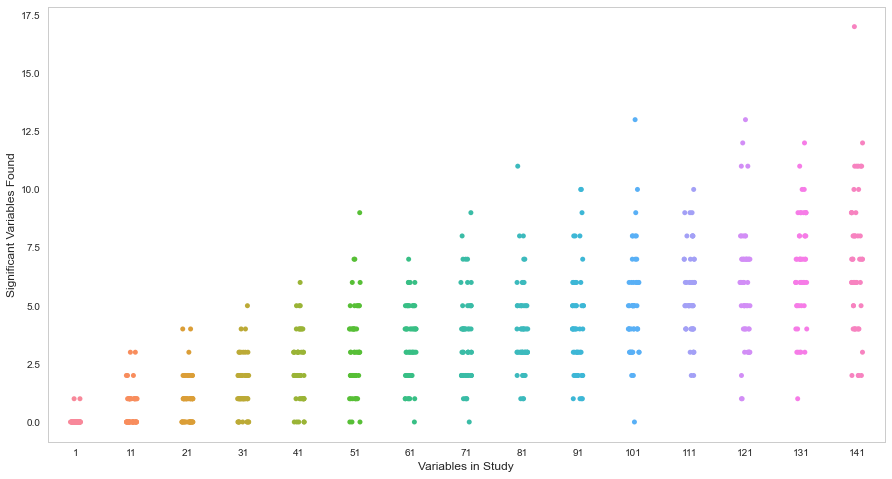

In [28]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
sns.stripplot(data=var_found_df, x='Variables in Study', y='Significant Variables Found');

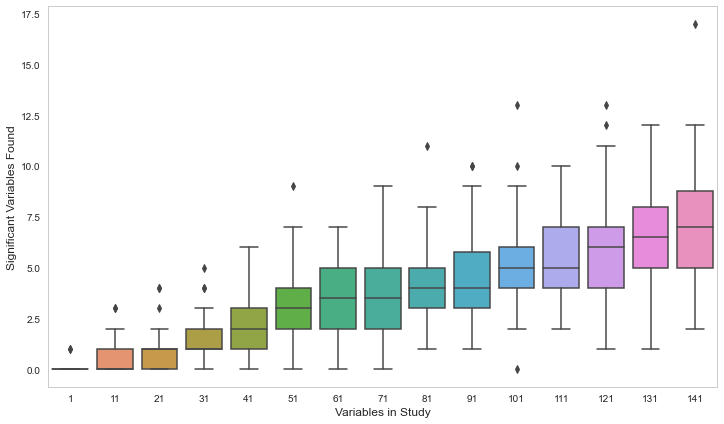

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(data=var_found_df,
            x='Variables in Study', y='Significant Variables Found');

## Multiple Testing Bias: Correction

Using the simple correction factor (number of tests performed), we can make the significant findings constant again. 
$$ p_{\mbox{cutoff}} = \frac{0.05}{\textrm{Number of Tests}} $$

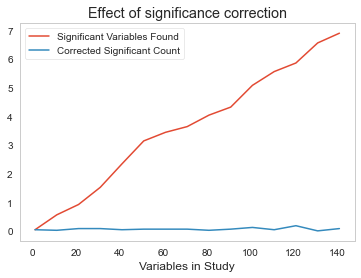

In [30]:
var_found_df['Corrected Significant Count'] = var_found_df['raw_values'].map(lambda p_values: 
                                                                             np.sum(p_values<0.05/len(p_values)))

var_found_df.groupby('Variables in Study').agg('mean').reset_index().plot('Variables in Study', [
    'Significant Variables Found',
    'Corrected Significant Count'
]);
plt.title('Effect of significance correction');

So no harm done there we just add this correction factor right?

Well, what if we have exactly one variable with shift of 1.0 standard deviations from the other. 

In a dataset where we check $n$ variables?

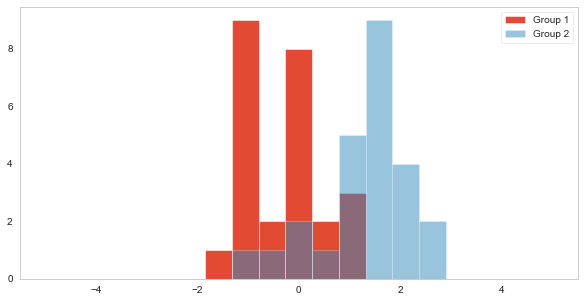

In [31]:
table_df = random_data_maker(50, 10)
really_different_var = np.concatenate([
    np.random.normal(loc=0, scale=1.0, size=(table_df.shape[0]//2)),
    np.random.normal(loc=1, scale=1.0, size=(table_df.shape[0]//2))
])
table_df['Really Different Var'] = really_different_var
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.hist(table_df.query('Group==1')['Really Different Var'], np.linspace(-5, 5, 20), label='Group 1')
ax1.hist(table_df.query('Group==2')['Really Different Var'], np.linspace(-5, 5, 20), label='Group 2', alpha=0.5);
ax1.legend();

In [32]:
out_p_value = []
for _ in range(200):
    out_p_value += [ttest_ind(np.random.normal(loc=0, scale=1.0, size=(table_df.shape[0]//2)),
          np.random.normal(loc=1, scale=1.0, size=(table_df.shape[0]//2))).pvalue]

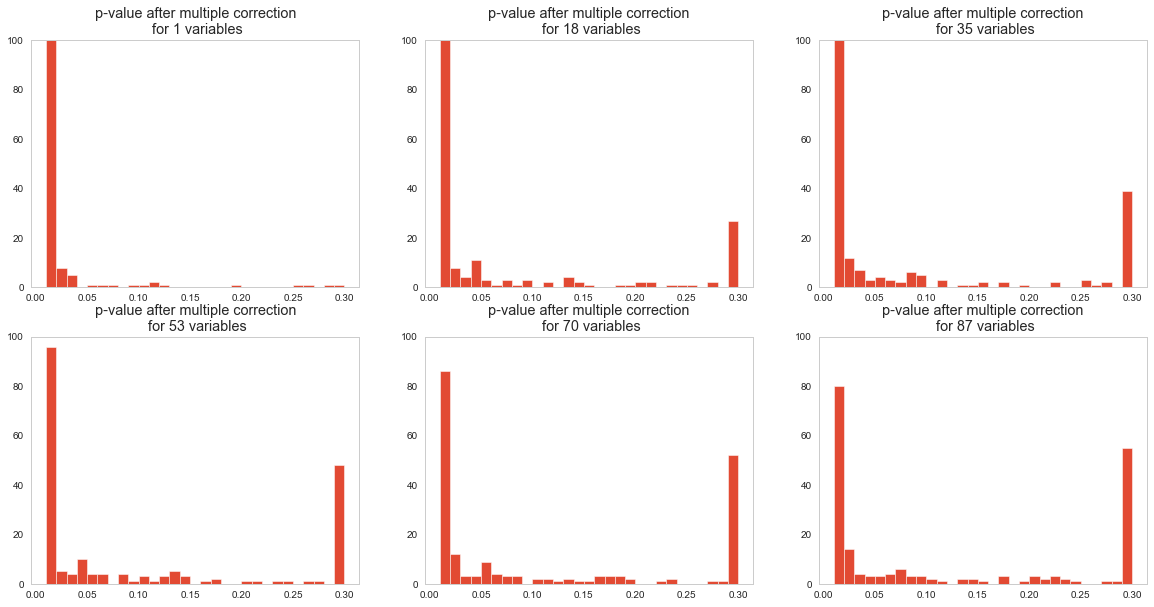

In [33]:
fig, m_axs = plt.subplots(2, 3, figsize=(20, 10))
for c_ax, var_count in zip(m_axs.flatten(), np.linspace(1, 140, 9).astype(int)):
    c_ax.hist(np.clip(np.array(out_p_value)*var_count, 0.01, 0.3), np.linspace(0.01, 0.3, 30))
    c_ax.set_ylim(0, 100)
    c_ax.set_title('p-value after multiple correction\n for {} variables'.format(var_count))

In [44]:
var_find_df = pd.DataFrame({'Variables': np.linspace(1, 100, 30).astype(int)})
var_find_df['Likelihood of Detecting Really Different Variable'] = var_find_df['Variables'].map(
    lambda var_count: np.mean(np.array(out_p_value)*var_count<0.05)
)
fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
var_find_df.plot('Variables', 'Likelihood of Detecting Really Different Variable', ax=ax1)
ax1.set_ylabel('% Likelihood');

NameError: name 'out_p_value' is not defined

# Predicting and Validating - main categories

<img src="figures/MLalgorithms.png" />

There are plenty machine-learning techniques available. Each one dedicated to a specific type of problem and data collection. {numref}`Fig <number> fig_mlcheatsheet` provides a guide to find the correct method for your problem. 

```{figure} figures/MLalgorithms.png
---
scale: 100%
name: fig_mlcheatsheet
---
A cheat sheet to identify the best machine learning technique for your problem.
```

A common task independent of which method you chose, it that you have to validate your processing workflow. This is important to be able to tell when and to what degree you can trust your workflow. 

Borrowed from http://peekaboo-vision.blogspot.ch/2013/01/machine-learning-cheat-sheet-for-scikit.html

## Overview


Basically all of these are ultimately functions which map inputs to outputs. 

### The input could be 

- an image
- a point
- a feature vector
- or a multidimensional tensor

### The output is

- a value (regression)
- a classification (classification)
- a group (clustering)
- a vector / matrix / tensor with _fewer_ degrees of input / less noise as the original data (dimensionality reduction)

### Overfitting

The most serious problem with machine learning and such approachs is overfitting your model to your data. Particularly as models get increasingly complex (random forest, neural networks, deep learning, ...), it becomes more and more difficult to apply common sense or even understand exactly what a model is doing and why a given answer is produced. 

```python
magic_classifier = {}
# training
magic_classifier['Dog']  = 'Animal'
magic_classifier['Bob']  = 'Person'
magic_classifier['Fish'] = 'Animal'
```

Now use this classifier, on the training data it works really well

```python
magic_classifier['Dog']  == 'Animal' # true, 1/1 so far!
magic_classifier['Bob']  == 'Person' # true, 2/2 still perfect!
magic_classifier['Fish'] == 'Animal' # true, 3/3, wow!
```

On new data it doesn't work at all, it doesn't even execute.

```python
magic_classifier['Octopus'] == 'Animal' # exception?! but it was working so well
magic_classifier['Dan']     == 'Person' # exception?! 
```

The above example appeared to be a perfect trainer for mapping names to animals or people, but it just memorized the inputs and reproduced them at the output and so didn't actually learn anything, it just copied.

## Validation

Relevant for each of the categories, but applied in a slightly different way depending on the group. 

The idea is to divide the dataset into groups called 
- ideally training, 
- validation, 
- and testing. 

The analysis is then 

- developed on __training__
- iteratively validated on __validation__
- ultimately tested on __testing__

## Concrete Example: Classifying Flowers


Here we return to the iris data set and try to automatically classify flowers

In [40]:
data = load_iris()
iris_df = pd.DataFrame(data['data'], columns=data['feature_names'])
iris_df['target'] = data['target_names'][data['target']]
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
21,5.1,3.7,1.5,0.4,setosa
41,4.5,2.3,1.3,0.3,setosa
24,4.8,3.4,1.9,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
95,5.7,3.0,4.2,1.2,versicolor


# Qualitative vs Quantitative

Given the complexity of the tree, we need to do some pruning

## Qualitative Assessment
 - Evaluating metrics using visual feedback
 - Compare with expectations from other independent techniques or approach
 - Are there artifacts which are included in the output?
 - Do the shapes look correct?
 - Are they distributed as expected?
 - Is their orientation meaningful?
 
![Porosity](figures/poros.png)

## Quantitative Metrics


With a quantitative approach, we can calculate 
- the specific shape 
- or distribution metrics on the sample 

with each parameter and establish the relationship between 
- parameter 
- and metric. 

## Parameters

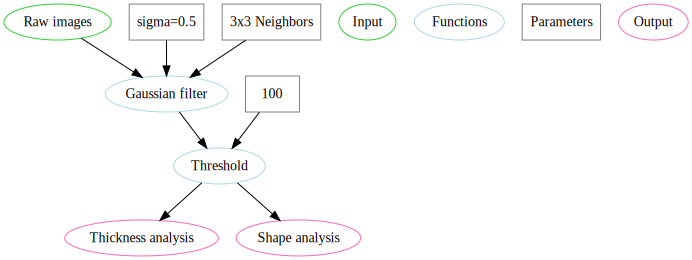

In [39]:
from graphviz import Digraph

dot = Digraph()

dot.node('Raw images',color='limegreen'),        dot.node('Gaussian filter', color='lightblue')
dot.node('sigma=0.5', color='gray',shape='box'), dot.node('3x3 Neighbors', color='gray',shape='box')
dot.node('Threshold', color='lightblue'),        dot.node('100', color='gray',shape='box')
dot.node('Thickness analysis',color='hotpink'),  dot.node('Shape analysis',color='hotpink')
dot.node('Input',color='limegreen'),        dot.node('Functions', color='lightblue')
dot.node('Parameters', color='gray',shape='box'),dot.node('Output',color='hotpink')

dot.edge('Raw images', 'Gaussian filter'),    dot.edge('sigma=0.5', 'Gaussian filter')
dot.edge('3x3 Neighbors', 'Gaussian filter'), dot.edge('Gaussian filter','Threshold')
dot.edge('Threshold', 'Thickness analysis'),  dot.edge('Threshold', 'Shape analysis')
dot.edge('100','Threshold')
dot

### Parameter Sweep

The way we do this is usually a parameter sweep which means 
- taking one (or more) parameters 
- and varying them between the reasonable bounds (judged qualitatively).

<img src="figures/parameter_sweep.png" style="height:400px"/>

The outcome of a parameter sweep can look like in the figure below.
```{figure} figures/parameter_sweep.png
---
scale: 50%
name: fig_parametersweep
---
Volume measurements for different thresholds
```
We can see that the volume is generally decreasing when the threshold increases. Still, it seems that the volume is not that sensitive to the choice of threshold. Variations in the order of about 50 voxels. That would correspond to a radius change from 6.3 to 6.7 for the equivalent spheres. On the other hand, this minor change could be the difference between separated or touching objects.

### Is it always the same?
<table><tr><td>
<img src="figures/parameter_sweep_volume.png" style="height:400px"/></td>
<td><img src="figures/parameter_sweep_orientation.png" style="height:400px"/></td></tr></table>

The jittered scatter plot in {numref}`fig {number} <fig_parametersweep>` makes it hard to see the distribution of the measurements. A violin plot as in the figure below is a histogram view of the data that allows stacking for different observations.

```{figure} figures/parameter_sweep_volume.png
---
scale: 50%
name: fig_parameters_violin
---
A violin plot of the volume data.
```

Now, what happens if we look at a different item metric like the orientation of the items. 
```{figure} figures/parameter_sweep_orientation.png
---
scale: 50%
name: fig_parameters_orientation
---
Scatter plot of the orientation of the items.
```
Here, we see a similar trend as we saw with the volume. 

## Sensitivity

### Control system theory
Sensitivity is defined as 
- the change in the value of an output 
- against the change in the input.


$$ S = \frac{|\Delta \textrm{Metric}|}{|\Delta \textrm{Parameter}|} $$

### Image processing
Such a strict definition is not particularly useful for image processing since 
- a threshold has a unit of intensity and 
- a metric might be volume which has $m^3$ 

$\rightarrow$ the sensitivity becomes volume per intensity!

 

### Practical Sensitivity

A more common approach is to estimate the variation in this parameter between images or within a single image (automatic threshold methods can be useful for this) and define the sensitivity based on this variation.

It is also common to normalize it with the mean value so the result is a percentage.

$$ S = \frac{max(\textrm{Metric})-min(\textrm{Metric})}{avg(\textrm{Metric})} $$

## Sensitivity: Real Measurements


In this graph it is magnitude of the slope. The steeper the slope the more the metric changes given a small change in the parameter

<img src="figures/sensitivity_counts.png" style="height:400px"/>

```{figure} figures/sensitivity_counts.png
---
width: 8cm 
---
Sensitivity measurement to measure how sensitive the object count is to the choice of the threshold.
```

## Sensitivity: compare more than one variable
Comparing Different Variables we see that 
- the best (lowest) value for the count sensitivity 
- is the highest for the volume and anisotropy. 

<img src="figures/sensitivity_compare.png" style="height:400px"/>

```{figure} figures/sensitivity_compare.png
---
width: 8cm 
name: fig_comparesensitivity
---
Sensitivity comparison for different metrics (Anisotropy, Count, Volume) to the choice of the threshold.
```

### A contradiction - Which metric is more important?

We see in {numref}`Fig <number> fig_comparesensitivity` that two parameters with relatively low sensitivity variations behave the same while the last one (_count_) fluctuates a lot with the threshold choice. Which one we use to guide our segmentation ultimately depends on the objective of the investigation. 

## Reproducibility
A very broad topic with plenty of sub-areas and deeper meanings. We mean two things by reproducibility

### Analysis
The process of going from images to numbers is detailed in a clear manner that __anyone__, __anywhere__ could follow and get the exact (within some tolerance) same numbers from your samples

- No platform dependence
- No proprietary or "in house" algorithms
- No manual *clicking*, *tweaking*, or *copying*
- A single script to go from image to result
 


### Measurement
Everything for analysis + taking a measurement several times (noise and exact alignment vary each time) does not change the statistics _significantly_

- No sensitivity to mounting or rotation
- No sensitivity to noise
- No dependence on exact illumination

## Reproducible Analysis

Since we will need to perform the same analysis many times to understand how reproducible it is.

- Notebooks are good to develop and document analysis workflow.
- The basis for reproducible analysis are scripts and macros. 

### With python scripts
```python
# #!/$PYTHONPATH/python
import sys
from myAnalysis import analysisScript # some analysis script you implemented

imageFile = sys.argv[0] # File name from command line

threshold = 130
analysisScript(fname=imageFile, threshold = threshold)
```


### or Matlab, ImageJ, or R
```bash
IMAGEFILE=$1
THRESHOLD=130
matlab -r "inImage=$IMAGEFILE; threshImage=inImage>$THRESHOLD; analysisScript;"
```
- __or__ 
```java -jar ij.jar -macro TestMacro.ijm blobs.tif```
- __or__
```Rscript -e "library(plyr);..."```

# Data frames - managing feature tables

## Our workflow
- Image analysis 
- Feature selection and analysis
- Presentation

<img src="figures/StoreFeatures.svg" style="height:500px"/>

```{figure} figures/StoreFeatures.pdf
---
scale: 80%
---
Different destinations of the processed data.
```

__How do we store the features while working with the data?__

## How do we store the features?
### Python offers different options
- Arrays per feature
- List of data structures/dictionaries

### Operations on the feature data 
- Counting
- Statistics
- Selections
- Transforms
- Visualization

### Problem
With custom storage we have to implement functions for each operation:
- Time consuming 
- Little flexibility
- Error prone

## Introducing data frames
We have already seen data frames in action but never formally introduced them...

__A data frame is__
- A data container
- Organized into columns and rows
- Has similarities to a spread sheet table
- Takes any data in the columns

__You can__
- Apply filters for selection
- Sort the rows
- Perform artihmetics
- Compute statistics
- Read and store into files and databases

[Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
[Getting started with Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)


## Create a data frame
There are different ways to create a data frame:
- From a dict
- From a data file
- From numpy arrays

First we have import pandas:

In [12]:
import pandas as pd

### Create a data frame from a list of dicts
This is the very basic use case. We create the data frame as the features are produced.

In [13]:
dl = []
for i in np.arange(0,10) :
    dl.append({'position' : i, 'sine' : np.sin(i)})
    
df = pd.DataFrame(dl)

df.head()

,position,sine
0,0,0.000000
1,1,0.841471
2,2,0.909297
3,3,0.141120
4,4,-0.756802


### Read from a spreadsheet (csv)
Sometimes the features have been extracted elsewhere and stored in a file, e.g. CSV

In [14]:
pheno = pd.read_csv('../../Exercises/10-Statistics_DataFrames/phenoTable.csv')
pheno.sample(5)

,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD,CORT_MOM__J,CT_TH_RAD,CT_TH_RAD_STD,CANAL_VOLUME,CANAL_COUNT,CANAL_DENSITY,...,CANAL_THETA,CANAL_THETA_CV,CANAL_PCA1,CANAL_PCA1_CV,CANAL_PCA2,CANAL_PCA2_CV,CANAL_PCA3,CANAL_PCA3_CV,FEMALE,ID
209,0.0338,64.780364,0.177613,0.016065,0.169543,71.384741,5.924213,19779.148179,181.0,229.776403,...,52.912140,0.438619,233.415950,1.264279,68.426520,1.085215,30.280091,0.832213,0,774
800,0.0354,53.619910,0.195603,0.024727,0.121444,91.660289,25.366255,22199.630763,228.0,325.940831,...,55.756463,0.393554,183.975770,0.875611,65.370292,1.005468,31.149474,0.478495,0,2236
378,0.0340,61.325783,0.184319,0.022697,0.178151,97.859726,23.184644,35332.803040,148.0,153.797288,...,51.595592,0.443372,244.900629,1.437175,74.206805,1.403870,30.065875,0.685734,0,1198
214,0.0341,56.769409,0.162205,0.015371,0.131968,80.097168,15.532274,21578.302039,145.0,223.330981,...,51.836266,0.462395,228.669439,1.551413,67.991221,1.072283,33.242083,1.185563,1,781
369,0.0346,61.592689,0.177944,0.022791,0.130907,75.224795,11.051342,15913.072599,134.0,188.260763,...,53.489277,0.430484,320.857967,1.172560,72.507860,0.984527,29.805521,0.599601,1,1181


Saving works similarly:

In [15]:
pheno.to_csv('pheno2.csv')

## Working with columns

### Add a new column
When we start working on the data, we may need to add a column
<img src="figures/new_column.svg" style="height:200px"/>

In [16]:
df['cosine'] = np.cos(df['position'])
df['sum']    = df['sine']+df['cosine']
df.head()

,position,sine,cosine,sum
0,0,0.000000,1.000000,1.000000
1,1,0.841471,0.540302,1.381773
2,2,0.909297,-0.416147,0.493151
3,3,0.141120,-0.989992,-0.848872
4,4,-0.756802,-0.653644,-1.410446


### Select some rows with content filtering

In [17]:
df2=df[0<df['sine']]
df2

,position,sine,cosine,sum
1,1,0.841471,0.540302,1.381773
2,2,0.909297,-0.416147,0.493151
3,3,0.141120,-0.989992,-0.848872
7,7,0.656987,0.753902,1.410889
8,8,0.989358,-0.145500,0.843858
9,9,0.412118,-0.911130,-0.499012


### Rename column titles
__Note__:Here is also a different way to create a data frame with dicts and lists.

In [18]:
df3 = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df3.head()

,A,B
0,1,4
1,2,5
2,3,6


In [19]:
df3.rename(columns={"A": "hej", "B": "hopp"})

,hej,hopp
0,1,4
1,2,5
2,3,6


## Statistics with a data frame
You can easily compute statistics on a data frame:
- mean
- std
- min
- max
- median

In [20]:
df.mean()

position    4.500000
sine        0.195521
cosine      0.042162
sum         0.237683
dtype: float64

In [21]:
df.describe()

,position,sine,cosine,sum
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,0.195521,0.042162,0.237683
std,3.02765,0.693076,0.765706,1.009325
min,0.00000,-0.958924,-0.989992,-1.410446
25%,2.25000,-0.209562,-0.594269,-0.631200
50%,4.50000,0.276619,0.069081,0.586953
75%,6.75000,0.795350,0.700502,0.960965
max,9.00000,0.989358,1.000000,1.410889


## Statistics of filtered data
Compute the standard deviation for all columns with the rows have 0<sum

In [22]:
df.head()
df[0<df["sum"]]['sine'].std()

0.5297967209946162

## Visualizing the contents of a data frame
In addition to all other plotting options, Pandas supports some basic plotting functionality 

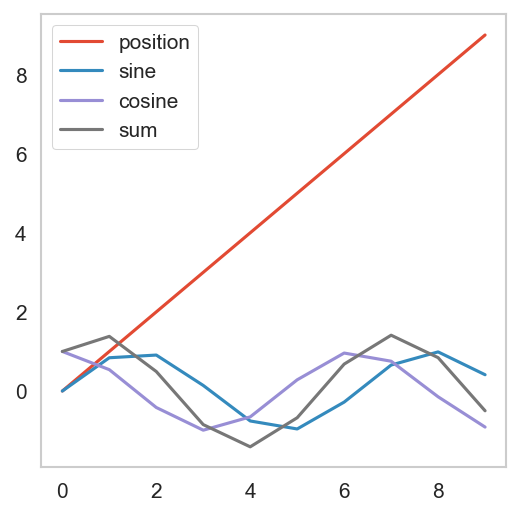

In [23]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
df.plot(ax=ax);

### Selective plotting
We mostly don't want to plot all columns at once

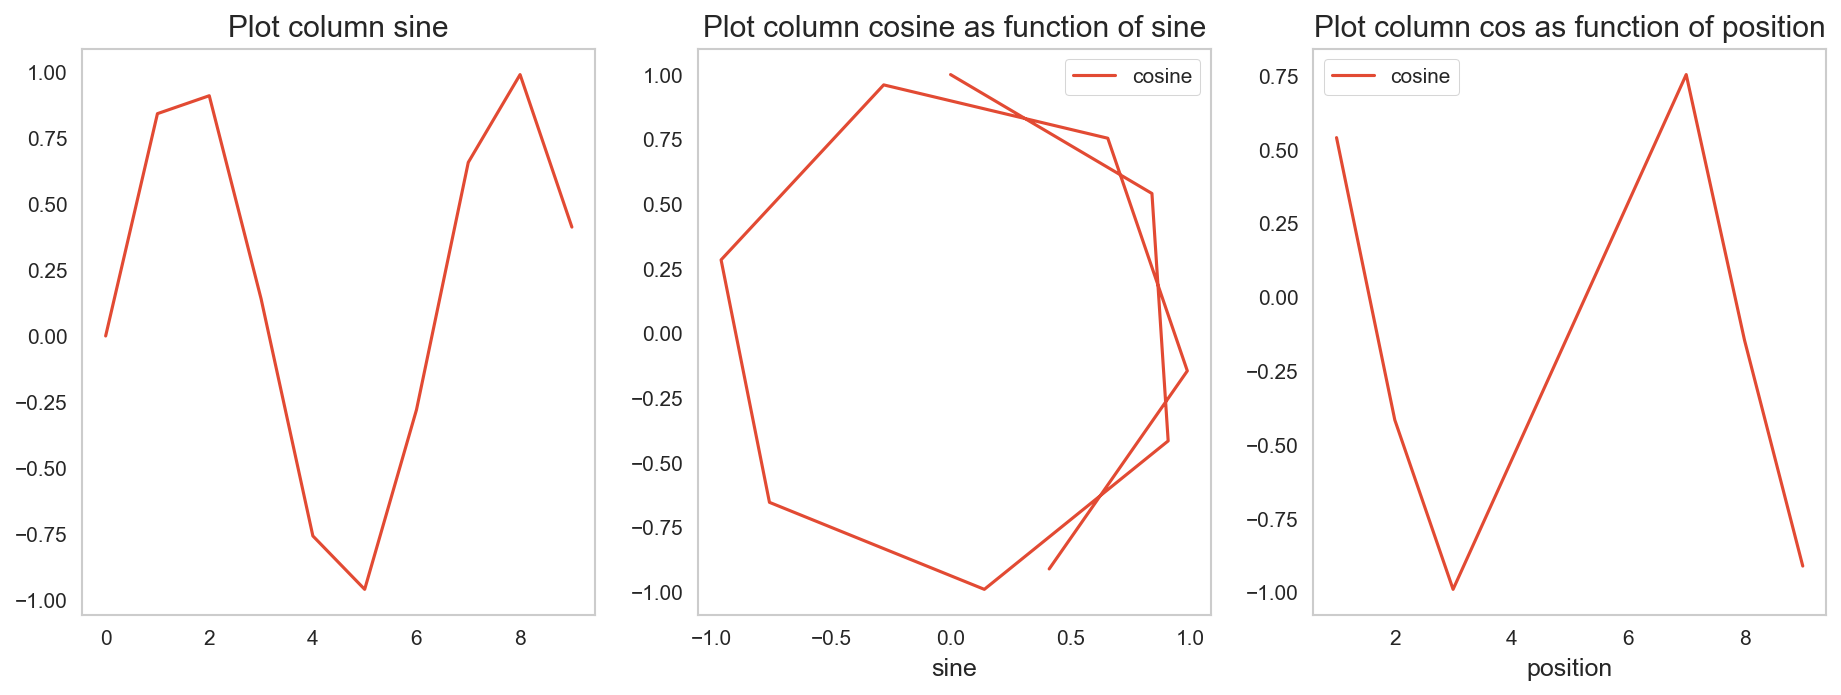

In [25]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

df['sine'].plot(ax=ax[0]); 
ax[0].set_title("Plot column sine"); 

df.plot(x='sine',y='cosine',ax=ax[1]); 
ax[1].set_title("Plot column cosine as function of sine")

df[0<df['sine']].plot(x='position',y='cosine',ax=ax[2]); 
ax[2].set_title("Plot column cos as function of position");

### Different plotting styles

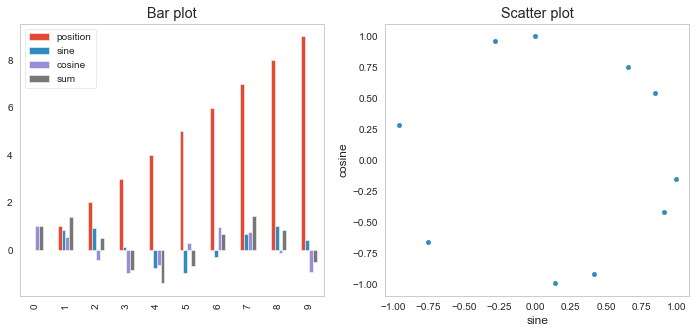

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

df.plot(kind='bar',ax=ax1); 
ax1.set_title('Bar plot');

df.plot(kind='scatter',x='sine',y='cosine',ax=ax2); 
ax2.set_title('Scatter plot');

Further plotting options can be found on [pandas visualization documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## Set operations with data frames
In our work we may produce several data frames that needs to be merged:
- Image features
- Meta data
- Sensor logs
- etc.

[Merging frames topic in Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

### Concatenating frames
#### Add more rows with the same categories

In [49]:
dfA = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

dfB = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']})

frames = [dfA, dfB]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [50]:
dfA = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

dfB = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


frames = [dfA, dfB]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Merging data frames
#### Add columns with new categories, at least one column in common.

In [51]:
dfA = pd.DataFrame({'id' : [1,2,3,4],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

dfB = pd.DataFrame({'id' : [1,2,3,4],
                    'X': ['B4', 'B5', 'B6', 'B7'],
                    'Y': ['C4', 'C5', 'C6', 'C7'],
                    'Z': ['D4', 'D5', 'D6', 'D7']},
                    index=[1,2,3,4])

result=pd.merge(dfA,dfB)
result

,id,A,B,C,D,X,Y,Z
0,1,A0,B0,C0,D0,B4,C4,D4
1,2,A1,B1,C1,D1,B5,C5,D5
2,3,A2,B2,C2,D2,B6,C6,D6
3,4,A3,B3,C3,D3,B7,C7,D7


## Create new data frame from selected columns

In [52]:
new = result[['A','C','D']]
new.head()

,A,C,D
0,A0,C0,D0
1,A1,C1,D1
2,A2,C2,D2
3,A3,C3,D3


## When are pandas data frames useful?
- Pandas is useful for *large* data - It must fit in the local memory.
- Really big data needs other options, e.g. [dask data frames](https://docs.dask.org/en/latest/dataframe.html)

### How about big quantitative imaging?
<img src="figures/size_abstraction.svg" style="height:300px">

__Images can be stored in the data frame, but think twice!__

```{figure} figures/size_abstraction.pdf
---
scale: 100%
---
The data size decreases radicall when we increase the level of abstraction.
```

# Presenting the results - bringing out the message

In the end you will want to present your results

<img src="figures/presentationmodes.svg" style="height:400px" />

```{figure} figures/presentationmodes.pdf
---
scale: 100%
---
Different ways to present your data.
```

## Visualization

One of the biggest problems with _big_ sciences is trying to visualize a lot of heterogeneous data. 

- Tables are difficult to interpret
- 3D Visualizations are very difficult to compare visually 
- Contradictory necessity of simple single value results and all of the data to look for trends and find problems

## Purpose of the visualization

You visualize your data for different reasons:
### Understanding and exploration 
- Small and known audience (you and colleagues)
- High degree of understanding of specific topic.
    
### Presenting your results
- Wider and sometimes unknown audience (reader of paper, person listening to presentation)
- At best general understanding of the topic.
    
<img src="figures/Knaflic_audience.png" style='height:300px'/> from [Knaflic 2015](https://doi.org/10.1002/9781119055259)

```{figure} figures/Knaflic_audience.png
---
scale: 80%
---
The level of detail in a presentation depends on the medium it is presented [Knaflic 2015](https://doi.org/10.1002/9781119055259).
```

## Bad Graphs

There are too many graphs which say:

- *my data is very complicated*
- *I know how to use __ toolbox in Python/Matlab/R/Mathematica*
- Most programs by default make poor plots
- Good visualizations takes time to produce

<img src="figures/scientific_paper_graph_quality_2x.png" style='height:300px'/>

```{figure} figures/scientific_paper_graph_quality_2x.png
---
scale: 60%
---
This cartoon from [XKCD](https://xkcd.com/1945/) highlights a problem with the access to software making it too easy to produce a graph or illustration.
```

### Some bad examples

There are plenty examples on how you shouldn't present your data. The problem is in general that there is way too much information that needs to be predigestend before it is ready to any audience.
```{figure} figures/badvisualizations.png
---
scale: 100%
---
Four examples of how _not_ to present your data.
```

<table>
    <tr><td><img src='figures/badImage1.png' style='height:300px'/></td><td><img src='figures/badPlot4.png' style='height:300px' /></td><td><img src='figures/badImage3.png' style='height:300px' /></td><td><img src='figures/badImage2.png' style='height:300px' /></td></tr></table>

## How to improve - Key Ideas 

There is a need to consciously prepare your figures to bring your message to the audience in an understandable way. The first step is to ask yourself the following questions.  

1. What is my message? 
1. Does the graphic communicate it clearly?
1. Is a graphic representation really necessary?
 - Does every line / color serve a purpose?
 - Pretend ink is very expensive

Keep this in mind every time you create a figure and you will notice that after while you will have a tool set that makes it easier and faster to produce well thought figures that clearly brings out you message to your audience. 

Personally, I always write scripts to produce each plot of a publication. This makes it easier to revise the manuscript in a reproducible and efficient manner. The first implementation may take longer, but the revision is done in no time. 

### Some literature

If you want to read more about how to work with data visualization. I can recommend these:

- [Knaflic, Storytelling with Data: A Data Visualization Guide for Business Professionals, 2015](https://doi.org/10.1002/9781119055259)

- [Few, Should data visualization always be beautiful?, 2012](https://www.perceptualedge.com/blog/?p=1169)

### Simple Rules

1. Never use 3D graphics when it can be avoided (unless you want to be deliberately misleading)
![Dumb 3d](figures/3dplot.png)
1. Pie charts can also be hard to interpret
1. Background color should almost always be white (not light gray)
1. Use color palettes adapted to human visual sensitivity 
1. Use colors and transparency smart


## Grammar of Graphics


### What is a grammar?
- Set of rules for constructing and validating a sentence
- Specifies the relationship and order between the words constituting the sentence

### How does grammar apply to graphics?
If we develop a consistent way of 
- expressing graphics (sentences) 
- in terms of elements (words) 
we can compose and decompose graphics easily


The most important modern work in graphical grammars is ["The Grammar of Graphics"](https://doi.org/10.1007/0-387-28695-0)  by Wilkinson, Anand, and Grossman (2005). 

This work built on earlier work by Bertin (1983) and proposed a grammar that can be used to describe and construct a wide range of statistical graphics.





### Grammar Explained

Normally we think of plots in terms of some sort of data which is fed into a plot command that produces a picture
- In Excel you select a range and plot-type and click "Make"
- In Matlab you run ```plot(xdata,ydata,color/shape)``` 

1. These produces entire graphics (sentences) or at least phrases in one go and thus abstract away from the idea of grammar. 
1. If you spoke by finding entire sentences in a book it would be very ineffective, it is much better to build up word by word

<img src="figures/niceplot.svg" style="height:500px">

### Grammar

Separate the graph into its component parts

<table>
<cols width="300px" />
<tr><th>Data mapping</th><th>Points</th><th>Axes/Coordinate system</th><th>Labels/annotation</th></tr>
<tr>
<td>$\begin{cases}var1 \rightarrow x\\var2 \rightarrow y\end{cases}$</td>
<td><img src="figures/niceplot_points.png" style="height:300px" /></td>
<td><img src="figures/niceplot_axes.png"   style="height:300px" /></td>
<td><img src="figures/niceplot_annotations.png" style="height:300px" /></td>
</tr>
</table>

Construct graphics by focusing on each portion independently.

### Figure decorations

Besides the data you also need to provide annotating items to the visualization. 

It may seem unnescessary to list these annotations, but it happens too often that they are missing. This leaves the observers wondering about what they see in the figure. It is true that it takes a little more time to add annotation to your figure. Sometimes, you may think that the plot is only for your own understanding and you don't need to waste the time on making it complete. Still, in the next moment it finds its way to the presentation and then all of a sudden it is offical...

Annotaitons are fundamental features of figures and available in any plotting library. In some cases you have to look a little longer to find them or write a little more code to use them, but they are there.

#### Plots
- Curve legend - telling what each curve represents.
- Axis labels - tellning what information you see on each axis.
- Figure title - if you use multiples plots in the same figure.

#### Images
- Color bar - to tell how the colors are mapped to the values.
- Scale bar - to tell the size of the object in the image.

### Color maps revisited
Choosing the right color is a science.

<img src="figures/colormapselection.png" style="height:700px" />

[Crameri, F., et al. (2020)]( https://doi.org/10.1038/s41467-020-19160-7)

## What is my message
Plots to "show the results" or "get a feeling" are usually not good

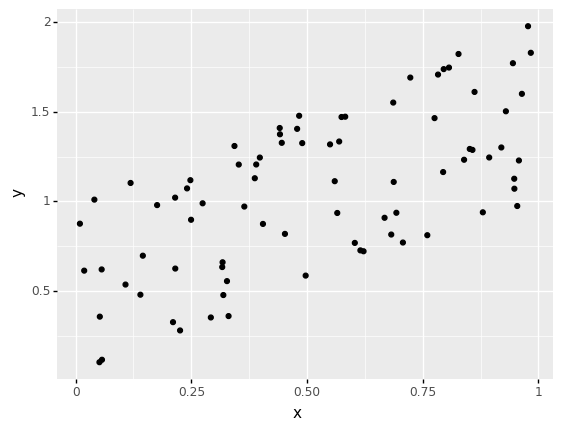

<ggplot: (8787941025741)>

In [45]:
from plotnine import *
from plotnine.data import *
import pandas as pd
# Some data
xd = np.random.rand(80)
yd = xd + np.random.rand(80)
zd = np.random.rand(80)

df = pd.DataFrame(dict(x=xd,y=yd,z=zd))
ggplot(df,aes(x='x',y='y')) + geom_point()

### Focus on a single, simple message
"X is a little bit correlated with Y"

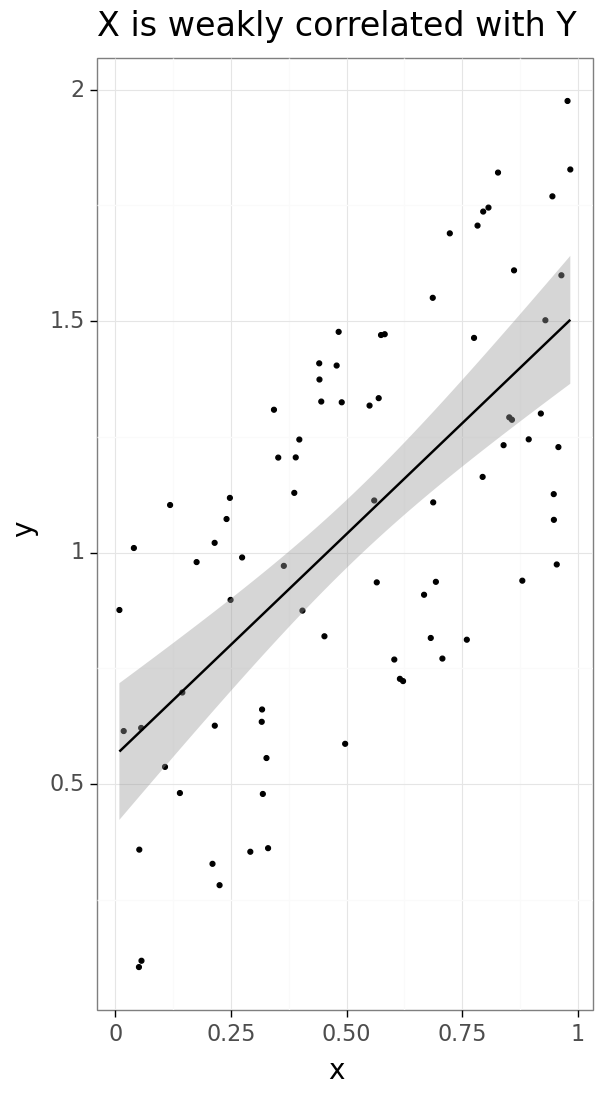

<ggplot: (8787940877050)>

In [46]:
(ggplot(df,aes(x='x',y='y')) 
 + geom_point() 
 + geom_smooth(method="lm")
 + coord_equal() 
 + labs(title="X is weakly correlated with Y")
 + theme_bw(20) )

### Does my graphic communicate it clearly?

Too much data makes it very difficult to derive a clear message

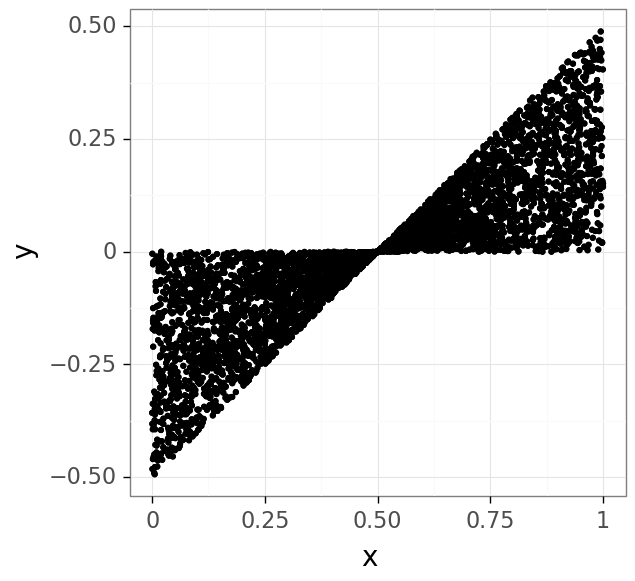

<ggplot: (8787941586676)>

In [47]:
xd = np.random.rand(5000)
yd = (xd-0.5)*np.random.rand(5000)

df = pd.DataFrame(dict(x=xd,y=yd))
(ggplot(df,aes(x='x',y='y')) 
 + geom_point()
 + geom_point()
 + coord_equal()
 + theme_bw(20))

### Reduce the data
Filter and reduce information until it is extremely simple

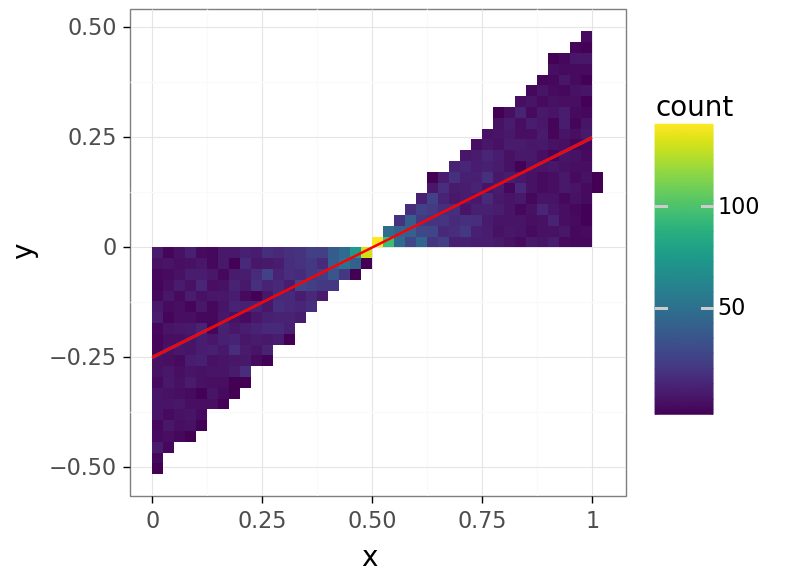

<ggplot: (8787907042018)>

In [53]:
(ggplot(df,aes(x='x',y='y'))
 + stat_bin_2d(bins=40)
 + geom_smooth(method="lm",color='red')
 + coord_equal()
 + theme_bw(20)
 + guides(color='F')
)

### Reduce even further

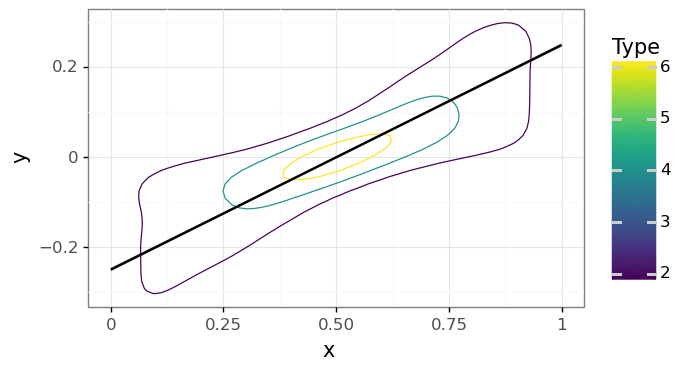

<ggplot: (8787907393976)>

In [35]:
(ggplot(df,aes(x='x',y='y'))
  + geom_density_2d(aes(x='x', y='y', color='..level..'))
  + geom_smooth(method="lm")
  + coord_equal() 
  + labs(color="Type")
  + theme_bw(15)
)

## Common visualization packages for python

- Matplotlib [Matplotlib 3.0 Cookbook](https://www.packtpub.com/big-data-and-business-intelligence/matplotlib-30-cookbook) or [ETHZ lib](https://learning.oreilly.com/library/view/matplotlib-30-cookbook/9781789135718), [code examples](https://github.com/PacktPublishing/Matplotlib-3.0-Cookbook)
- Plotly
- Seaborn
- ggplot [R using the ggplot2 library](https://doi.org/10.1007/978-3-319-24277-4), which is ported to [python](https://www.datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python).

A short summary of these packages can be found [here](https://mode.com/blog/python-data-visualization-libraries/#:~:text=matplotlib%20is%20the%20O.G.%20of,language%20developed%20in%20the%201980s.).

# Summary

## Statistics
- I am not a statistician and is not a statistics course
- If you have questions or concerns
 - Both ETHZ and Uni Zurich offer [__free__ consultation](https://math.ethz.ch/sfs/consulting/consulting-service.html) with real statisticians
 - They are rarely bearers of good news - you allways need more data... 
 
- Simulations (even simple ones) are very helpful 
- Try and understand the tests you are performing


## Data frames
- A tool for handling the mess of data storage and analysis
- A local database that allows filtering, arithmetics, plotting, etc. 

## Visualization
- Visualization is the crowning piece of your investigation - make it count!
- Many toolboxes can be used, choose the one that fits your needs.



## Old slides to transfer from R to python

[old lecture 2017](https://rawgit.com/Quantitative-Big-Imaging/Quantitative-Big-Imaging-2017/master/Lectures/08-Slides.html#(53))
[old lecture 2019](https://github.com/kmader/Quantitative-Big-Imaging-2019)